### Setup and Load Data ###

In [1]:
run ../initialize.ipynb

Lax Version : 1.5.2


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
mpl.rcParams['axes.linewidth'] = 2.5
R_tpc=pax_config['DEFAULT']['tpc_radius']

In [3]:
def get_file_list(path, pattern, remove_string='', remove_path=True):
    '''
    Get a list of files matching pattern in path. Optional to remove a part of the path (i.e. the extention)
    Optional to remove the path
    '''
    file_list = glob.glob(path + pattern)
    # Remove path
    for i, f in enumerate(file_list):
        if remove_path:
            f = f.replace(path, '')
        if remove_string != '':
            f = f.replace(remove_string, '')
        file_list[i] = f
    file_list = np.sort(file_list)
    return file_list


### Extract Hist from pre-processed pickles: SR0

In [135]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun0'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']

Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 1390 rows removed (4.86% passed)
Source in place selection: 559 rows removed (61.74% passed)
Source in place selection: 1372 rows removed (6.09% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [136]:
%%time
print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

  0%|          | 0/3453 [00:00<?, ?it/s]

Radon Data
Found 3453 datasets


100%|██████████| 3453/3453 [02:24<00:00, 23.86it/s]

CPU times: user 13.2 s, sys: 17.8 s, total: 31 s
Wall time: 2min 24s


In [137]:
dict_source_sr0={'Radon' : dicts_datasets_rn, 'Krypton': dicts_datasets_kr, 'Background' : dicts_datasets_bkg}
for source, dict_data in dict_source_sr0.items():
    print(source, len(dict_data))

Background 901
Krypton 89
Radon 70


### Extract Hist from pre-processed pickles: SR1

In [138]:
datasets = hax.runs.datasets 
datasets = hax.runs.tags_selection(include=['*sciencerun1'],
                                  exclude=['bad','messy', 'test',
                                           'nofield','lowfield',
                                           'commissioning', 'flash',
                                           'pmttrip','trip','_pmttrip',
                                           'source_opening',
                                           ],
                                  )
datasets= hax.cuts.selection(datasets, datasets['location'] != '', 'Processed data available')

#Radon
datasets_rn = hax.cuts.selection(datasets, datasets['source__type']=='Rn220', 'Source in place')
dataset_names_rn = datasets_rn['name']

#Bkg
datasets_bkg = hax.cuts.selection(datasets, datasets['source__type']=='none', 'Source in place')
dataset_names_bkg = datasets_bkg['name']

#Krypton
datasets_kr = hax.cuts.selection(datasets, datasets['source__type']=='Kr83m', 'Source in place')
dataset_names_kr = datasets_kr['name']

Processed data available selection: 0 rows removed (100.00% passed)
Source in place selection: 7229 rows removed (4.56% passed)
Source in place selection: 1185 rows removed (84.35% passed)
Source in place selection: 7119 rows removed (6.01% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [139]:
%%time
print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn={}
dicts_datasets_kr={}
dicts_datasets_bkg={}
for dataset in tqdm(datasets[:]):
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_rn[key]=data_dict
              
    elif dataset_names_kr.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_kr[key]=data_dict
        
    elif dataset_names_bkg.isin([dataset[:-7]]).any():
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
        dicts_datasets_bkg[key]=data_dict
    
#df_PI=pd.concat(df_PI)

  0%|          | 0/3453 [00:00<?, ?it/s]

Radon Data
Found 3453 datasets


100%|██████████| 3453/3453 [06:27<00:00,  8.91it/s] 

CPU times: user 27 s, sys: 34.1 s, total: 1min 1s
Wall time: 6min 27s


In [149]:
dict_source_sr1={'Radon' : dicts_datasets_rn, 'Krypton': dicts_datasets_kr, 'Background' : dicts_datasets_bkg}
for source, dict_data in dict_source_sr1.items():
    print(source, len(dict_data))

Background 1969
Krypton 204
Radon 200


### Time Distribution

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 40%|███▉      | 359/901 [00:00<00:00, 3588.29it/s]

Background
Source in place selection: 6795 rows removed (67.00% passed)


100%|██████████| 901/901 [00:00<00:00, 3578.48it/s]
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████| 89/89 [00:00<00:00, 3491.17it/s]


Krypton
Source in place selection: 19022 rows removed (7.63% passed)


100%|██████████| 70/70 [00:00<00:00, 3295.34it/s]

Radon
Source in place selection: 19177 rows removed (6.88% passed)



 13%|█▎        | 248/1969 [00:00<00:00, 2477.21it/s]

Background
Source in place selection: 6795 rows removed (67.00% passed)


100%|██████████| 1969/1969 [00:00<00:00, 3394.08it/s]
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████| 204/204 [00:00<00:00, 4556.16it/s]


Krypton
Source in place selection: 19022 rows removed (7.63% passed)


100%|██████████| 200/200 [00:00<00:00, 3681.31it/s]

Radon
Source in place selection: 19177 rows removed (6.88% passed)


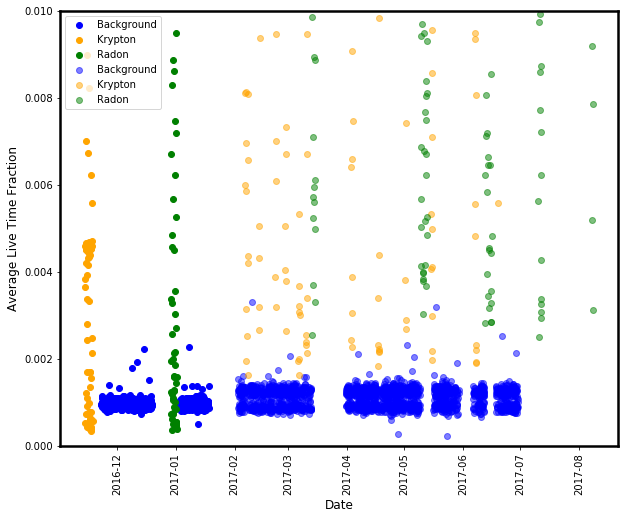

In [141]:
# Plots average lifetime over a run, versus run number

#plt.figure(figsize=(10, 8))
source_key={'Radon': 'Rn220', 'Krypton': 'Kr83m', 'Background': 'none'}
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
source_dfs_sr0={}
source_dfs_sr1={}

for source, dict_data in dict_source_sr0.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events=data['events']

        new_hist=livet_hist.sum('s2_area')
        new_hist=new_hist/events
            
        average_array.append(np.average(new_hist[:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
                
    #plt.xlabel('Time Since S2 [ns]', fontsize=12)
    #plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
    #plt.xlim([_xmin, _xmax])
    #plt.savefig("fig_%s_reduced_livet.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_reduced_livet.pdf" %source, bboxes='tight')
    #plt.show()
    
    source_dfs_sr0[source]=test_df

livet_hist=0
events=0   
for source, dict_data in dict_source_sr1.items():
    print(source)
    #plt.figure(figsize=(10, 8))
    
    average_array=[]
    datasets_array=[]
    
    datasets = hax.runs.datasets
    datasets_source = hax.cuts.selection(datasets, datasets['source__type']==source_key[source], 'Source in place')

    for key, data in tqdm(dict_data.items()):
        livet_hist
        livet_hist=data['livet_hist']
        events=data['events']

        new_hist=livet_hist.sum('s2_area')
        new_hist=new_hist/events
            
        average_array.append(np.average(new_hist[:]))
        datasets_array.append(key)
        
    source_datasets=datasets.loc[datasets.name.isin(datasets_array)]
    assert len(average_array)==len(source_datasets)
    source_datasets['average_livetime']=average_array
    test_df=pd.DataFrame({'name': datasets_array, 'average': average_array})
    test_df=pd.merge(source_datasets, test_df, on='name', how='outer')
                
    #plt.xlabel('Time Since S2 [ns]', fontsize=12)
    #plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
    #plt.xlim([_xmin, _xmax])
    #plt.savefig("fig_%s_reduced_livet.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_reduced_livet.pdf" %source, bboxes='tight')
    #plt.show()
    
    source_dfs_sr1[source]=test_df

plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr0.items():
    plt.plot(df['start'], df['average_livetime'], marker='o', linewidth=0, color=colours[index], label=key)
    index+=1
index=0
for key, df in source_dfs_sr1.items():
    plt.plot(df['start'], df['average_livetime'], marker='o', linewidth=0, color=colours[index], label=key, alpha =0.5)
    index+=1
plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 3), datetime.date(2017, 2, 6)])
plt.ylim([0, 0.01])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


###  Livetime - all events

Background
1825692
Krypton
1794282
Radon
2673544
Background
Background 170620_2315
Background 170209_0611
Background 170209_0812
Background 170411_2114
Background 170620_2215
7731668
Krypton
Krypton 170310_1215
8562947
Radon
13428205


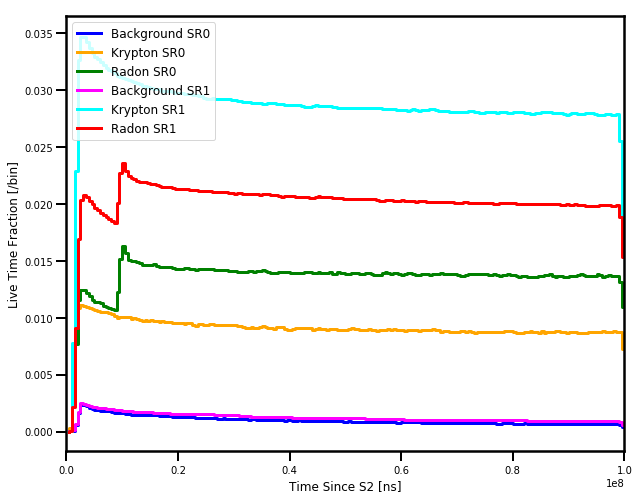

In [35]:
#Plots Live Time Fraction#

plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Blues")
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            weight_hist+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            weight_hist=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
    
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)


plt.xlim([0, _xmax])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Live Time Fraction [/bin]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_livet_example.png", bboxes='tight')
#plt.savefig("fig_livet_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Uncorrected Peak Rate

Background
1825692
Krypton
1794282
Radon
2673544
Background
Background 170620_2315
Background 170209_0611
Background 170209_0812
Background 170411_2114
Background 170620_2215
7731668
Krypton
Krypton 170310_1215
8562947
Radon
13428205


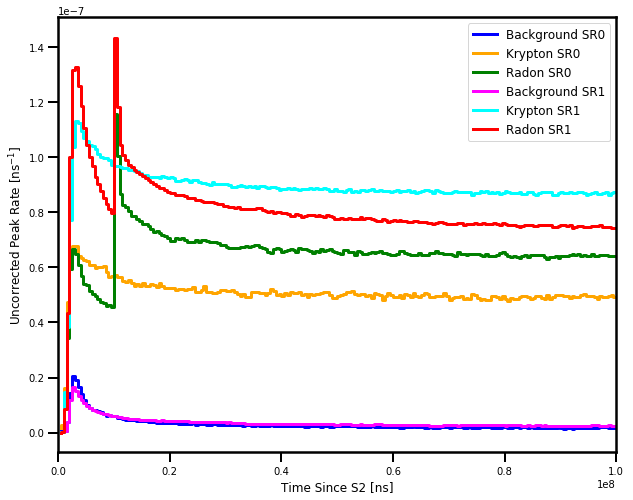

In [33]:
#Plots uncorrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0
plt.set_cmap("Blues")
for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    events_hist=events_hist
    weight_hist=weight_hist.sum('s2_area')
    weight_hist=weight_hist

    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=events_hist-np.sqrt(weight_hist)
    y2=events_hist+np.sqrt(weight_hist)
    y_single = np.repeat(y1[:], 2)
    y_total = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], events_hist/events, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_single/events, y_total/events, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([0, window_length])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Uncorrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

### Live Time Corrected Peak Rate

Background
1825692
Krypton
1794282
Radon
2673544
Background
Background 170620_2315
Background 170209_0611
Background 170209_0812
Background 170411_2114
Background 170620_2215
7731668
Krypton
Krypton 170310_1215
8562947
Radon
13428205


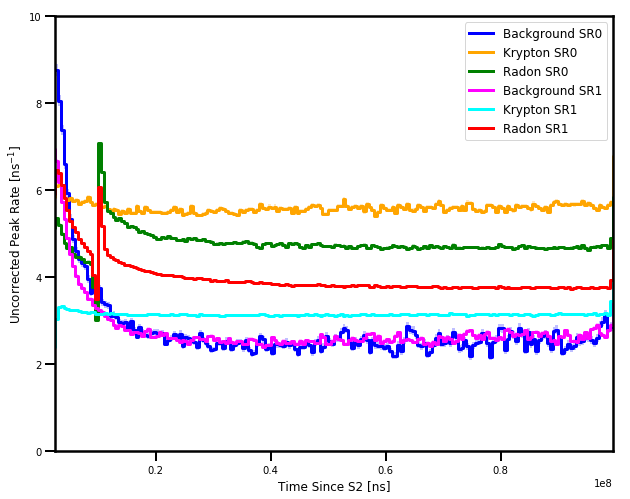

In [36]:
#Plots corrected event with error added#

plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_source_sr0.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR0')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)
    
for source, dict_data in dict_source_sr1.items():
    print(source)
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source+' SR1')
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([0, 10])
plt.xlabel('Time Since S2 [ms]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ns$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Questions:
    
 1.) Why Kr_SR0 higher than Kr_SR1? Probably event rate related. Look at individual calibrations. Should decrease with Kr source strength. If so, need some kind of cut to remove peaks from other events.
 
 2.)Why is Rn_SR0 higher than Rn_SR1. Source has not changed in activity signficantly. Injection procedure might have changed however. Could be lower overall event rate in SR1 if Kr explanation from (1) holds. Simple to check event rate.
 
 3.) Might be different "decay" tmes in SR0 and SR1 background. Could be bacground related? More alpha backgrounds in SR0 possibly. Check individual energy lines to be sure

### Split By Date of Krypton Dataset

  * If peak rate is related to event rate, should see decreasing peak rate trend in Krypton data

2017-01-17 2017-02-10
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 109 rows removed (21.01% passed)
2017-02-10 2017-02-17
TimeCut Low selection: 29 rows removed (78.99% passed)
TimeCut High selection: 94 rows removed (13.76% passed)
2017-02-17 2017-02-24
TimeCut Low selection: 44 rows removed (68.12% passed)
TimeCut High selection: 77 rows removed (18.09% passed)
2017-02-24 2017-03-03
TimeCut Low selection: 61 rows removed (55.80% passed)
TimeCut High selection: 61 rows removed (20.78% passed)
2017-03-03 2017-03-06
TimeCut Low selection: 77 rows removed (44.20% passed)
TimeCut High selection: 61 rows removed (0.00% passed)
2017-03-06 2017-03-20
TimeCut Low selection: 77 rows removed (44.20% passed)
TimeCut High selection: 30 rows removed (50.82% passed)
2017-03-20 2017-04-01
TimeCut Low selection: 108 rows removed (21.74% passed)
TimeCut High selection: 30 rows removed (0.00% passed)
2017-04-01 2017-04-09
TimeCut Low selection: 108 rows removed (21.74%

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


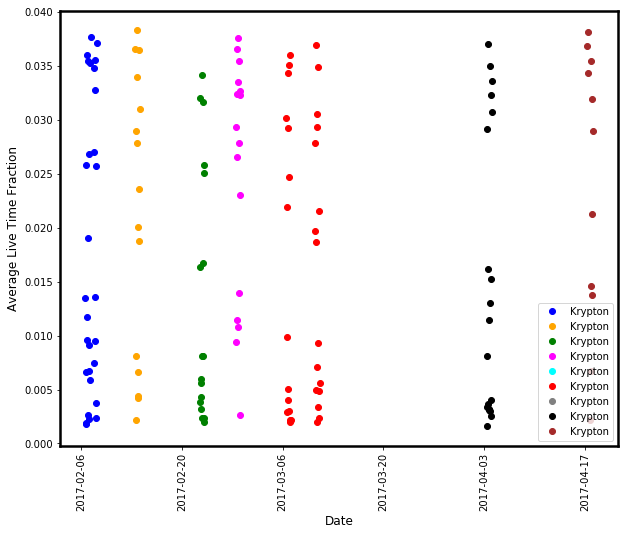

In [112]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Krypton':
        for t_index, date in enumerate(kr_cal_dates[:-1]):
            print(kr_cal_dates[t_index], kr_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [113]:
%%time

kr_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 2, 10), datetime.date(2017, 2, 17), 
              datetime.date(2017, 2, 24), datetime.date(2017, 3, 3), datetime.date(2017, 3, 10), 
              datetime.date(2017, 3, 20), datetime.date(2017, 4, 7), datetime.date(2017, 4, 20)]

print('Load Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_kr_calibrations={}
for t_index, date in enumerate(kr_cal_dates[:-1]):
    df=datasets_kr
    df_temp=hax.cuts.selection(df, df.start>kr_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<kr_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_kr_calibrations['Cal %i' %t_index]=dict_calibration

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 12%|█▏        | 422/3386 [00:00<00:00, 4212.17it/s]

Load Data
Found 3386 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 426 rows removed (6.37% passed)


 13%|█▎        | 453/3386 [00:00<00:00, 4528.23it/s]

TimeCut Low selection: 29 rows removed (93.63% passed)
TimeCut High selection: 411 rows removed (3.52% passed)


 14%|█▍        | 476/3386 [00:00<00:00, 4751.34it/s]

TimeCut Low selection: 44 rows removed (90.33% passed)
TimeCut High selection: 394 rows removed (4.14% passed)


 14%|█▍        | 471/3386 [00:00<00:00, 4706.42it/s]

TimeCut Low selection: 61 rows removed (86.59% passed)
TimeCut High selection: 378 rows removed (4.06% passed)


 14%|█▍        | 486/3386 [00:00<00:00, 4850.00it/s]

TimeCut Low selection: 77 rows removed (83.08% passed)
TimeCut High selection: 363 rows removed (3.97% passed)


 14%|█▍        | 471/3386 [00:00<00:00, 4705.39it/s]

TimeCut Low selection: 92 rows removed (79.78% passed)
TimeCut High selection: 347 rows removed (4.41% passed)


 16%|█▋        | 558/3386 [00:00<00:00, 5571.45it/s]

TimeCut Low selection: 108 rows removed (76.26% passed)
TimeCut High selection: 328 rows removed (5.48% passed)


 14%|█▍        | 488/3386 [00:00<00:00, 4878.20it/s]

TimeCut Low selection: 127 rows removed (72.09% passed)
TimeCut High selection: 310 rows removed (5.49% passed)


100%|██████████| 3386/3386 [00:02<00:00, 1658.43it/s]

CPU times: user 6.84 s, sys: 679 ms, total: 7.52 s
Wall time: 21 s


Cal 3 16
1187321
Cal 0 29
2808031
Cal 5 16
Cal 5 170310_1215


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in multiply
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide


1058963
Cal 7 12
621796
Cal 6 19
1413690
Cal 1 15
1115570
Cal 4 15
1112301
Cal 2 17


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in true_divide


1352916


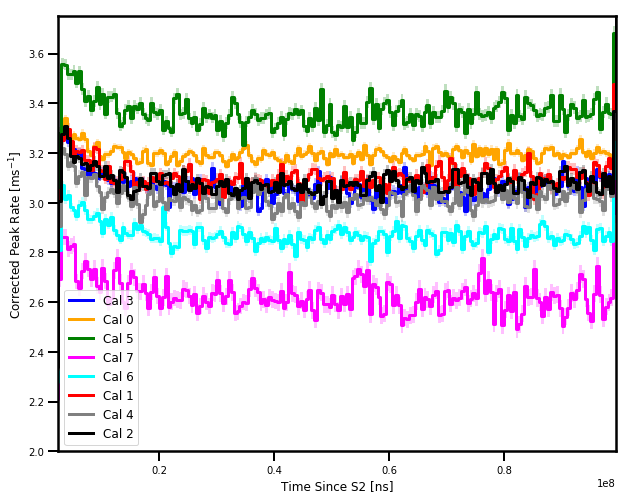

In [116]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_kr_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([2, 3.75])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

1.) Peak rate related to event rate seems to be true in Kr data, though 6th injection (Cal 5), is an outlier. Problematic. Decrease trend aslo not consistent with Rb83 half life

### Split by Date of Rn Datasets

2017-01-17 2017-04-01
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 164 rows removed (18.00% passed)
2017-04-01 2017-06-01
TimeCut Low selection: 36 rows removed (82.00% passed)
TimeCut High selection: 105 rows removed (35.98% passed)
2017-06-01 2017-07-01
TimeCut Low selection: 95 rows removed (52.50% passed)
TimeCut High selection: 37 rows removed (64.76% passed)
2017-07-01 2017-08-01
TimeCut Low selection: 163 rows removed (18.50% passed)
TimeCut High selection: 11 rows removed (70.27% passed)
2017-08-01 2017-09-01
TimeCut Low selection: 189 rows removed (5.50% passed)
TimeCut High selection: 0 rows removed (100.00% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


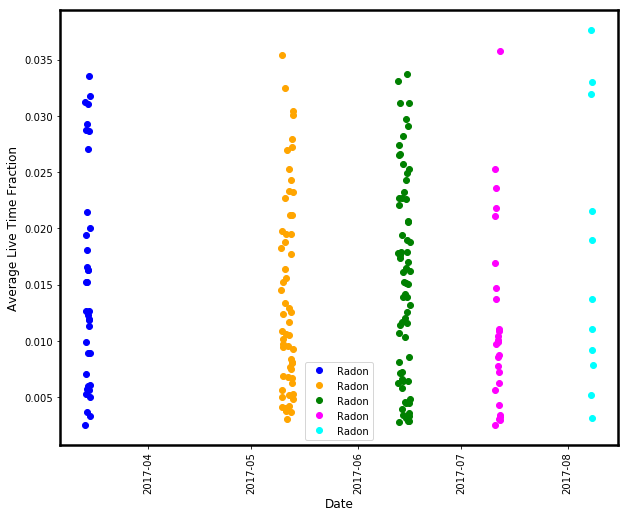

In [119]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Radon':
        for t_index, date in enumerate(rn_cal_dates[:-1]):
            print(rn_cal_dates[t_index], rn_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 3, 1), datetime.date(2017, 4, 20)])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [118]:
%%time

rn_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), 
              datetime.date(2017, 7, 1), datetime.date(2017, 8, 1), datetime.date(2017, 9, 1)]

print('Load Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_rn_calibrations={}
for t_index, date in enumerate(rn_cal_dates[:-1]):
    df=datasets_rn
    df_temp=hax.cuts.selection(df, df.start>rn_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<rn_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_rn_calibrations['Cal %i' %t_index]=dict_calibration

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 14%|█▍        | 480/3386 [00:00<00:00, 4792.11it/s]

Load Data
Found 3386 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 309 rows removed (10.43% passed)


 13%|█▎        | 450/3386 [00:00<00:00, 4497.15it/s]

TimeCut Low selection: 36 rows removed (89.57% passed)
TimeCut High selection: 250 rows removed (19.09% passed)


 13%|█▎        | 426/3386 [00:00<00:00, 4256.35it/s]

TimeCut Low selection: 95 rows removed (72.46% passed)
TimeCut High selection: 182 rows removed (27.20% passed)


 10%|▉         | 330/3386 [00:00<00:00, 3293.26it/s]

TimeCut Low selection: 163 rows removed (52.75% passed)
TimeCut High selection: 156 rows removed (14.29% passed)


 14%|█▎        | 461/3386 [00:00<00:00, 4604.83it/s]

TimeCut Low selection: 189 rows removed (45.22% passed)
TimeCut High selection: 92 rows removed (41.03% passed)


100%|██████████| 3386/3386 [00:02<00:00, 1530.74it/s]

CPU times: user 5.46 s, sys: 2.76 s, total: 8.22 s
Wall time: 31.3 s


Cal 1 59
3400386
Cal 3 26
2242460
Cal 0 36
2196794
Cal 4 11
1149277
Cal 2 68
4439288


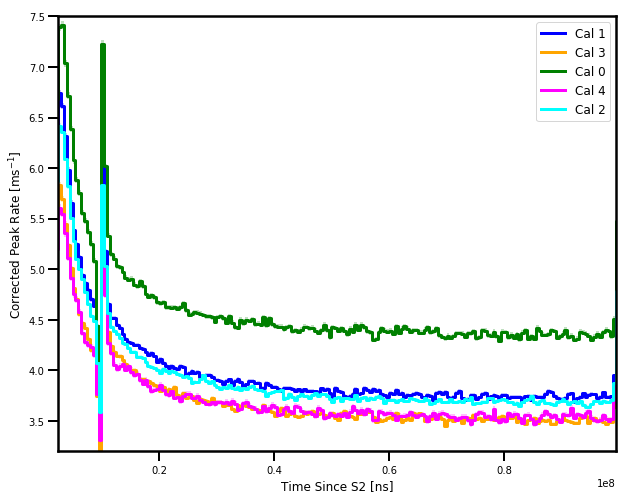

In [143]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_rn_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([3.2, 7.5])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

Rn data also shows decreasing trend in prak rate. But why though? This would not be expected, as Th228 does not decay over months timescale, and increasing e-lifetime should lead to higher not lower single electron rate.

Look at Bkg data. Deocouples "opening the valve" effect.

### Split Bkg data by Date

2017-01-17 2017-03-01
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 1545 rows removed (21.53% passed)
2017-03-01 2017-04-01
TimeCut Low selection: 424 rows removed (78.47% passed)
TimeCut High selection: 1332 rows removed (13.79% passed)
2017-04-01 2017-05-01
TimeCut Low selection: 637 rows removed (67.65% passed)
TimeCut High selection: 729 rows removed (45.27% passed)
2017-05-01 2017-06-01
TimeCut Low selection: 1240 rows removed (37.02% passed)
TimeCut High selection: 325 rows removed (55.42% passed)
2017-06-01 2017-07-01
TimeCut Low selection: 1644 rows removed (16.51% passed)
TimeCut High selection: 0 rows removed (100.00% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


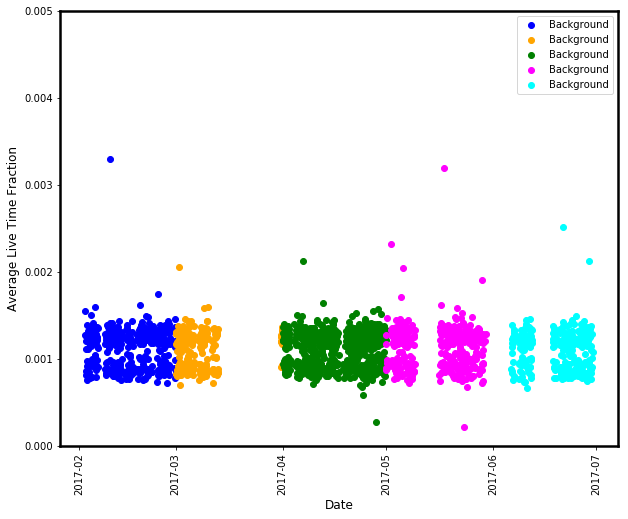

In [148]:
plt.figure(figsize=(10, 8))
index=0
for key, df in source_dfs_sr1.items():
    if key == 'Background':
        for t_index, date in enumerate(bkg_cal_dates[:-1]):
            print(bkg_cal_dates[t_index], bkg_cal_dates[t_index+1])
            df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
            df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
            plt.plot(df_temp['start'], df_temp['average_livetime'], 
                     marker='o', linewidth=0, color=colours[index], label=key)
            index+=1
        #plt.plot(df['start'], df['average_livetime'], 
        #        marker='s', linewidth=0, color='black', label=key, markersize=10)

plt.xlabel('Date', fontsize=12)
#plt.xlim([datetime.date(2017, 2, 1), datetime.date(2017, 3, 1)])
plt.ylim([0, 0.005])
plt.legend(loc='best')
plt.ylabel('Average Live Time Fraction', fontsize=12)
plt.xticks(rotation='vertical')
#plt.savefig("fig_date_livet.png", bboxes='tight')
#plt.savefig("fig_date_livet.pdf", bboxes='tight')
plt.show()


In [130]:
%%time

bkg_cal_dates=[datetime.date(2017, 1, 17), datetime.date(2017, 3, 1), datetime.date(2017, 4, 1), 
              datetime.date(2017, 5, 1), datetime.date(2017, 6, 1), datetime.date(2017, 7, 1)]

print('Load Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*dt.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dict_bkg_calibrations={}
for t_index, date in enumerate(bkg_cal_dates[:-1]):
    df=datasets_bkg
    df_temp=hax.cuts.selection(df, df.start>bkg_cal_dates[t_index], 'TimeCut Low')
    df_temp=hax.cuts.selection(df_temp, df_temp.start<bkg_cal_dates[t_index+1], 'TimeCut High')
    dataset_names=df_temp['name']
    dict_calibration={}
    for dataset in tqdm(datasets[:]):
        key=dataset[:-7]
        if dataset_names.isin([dataset[:-7]]).any():
            with open(simpath+dataset, 'rb') as handle:
                data_dict = pickle.load(handle)
                dict_calibration[key]=data_dict
    dict_bkg_calibrations['Cal %i' %t_index]=dict_calibration

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.4.0-py3.4.egg/hax/cuts.py:125: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]
 13%|█▎        | 431/3386 [00:00<00:00, 4300.49it/s]

Load Data
Found 3386 datasets
TimeCut Low selection: 0 rows removed (100.00% passed)
TimeCut High selection: 5965 rows removed (6.64% passed)


 14%|█▎        | 459/3386 [00:00<00:00, 4588.18it/s]

TimeCut Low selection: 424 rows removed (93.36% passed)
TimeCut High selection: 5752 rows removed (3.57% passed)


 11%|█         | 377/3386 [00:00<00:00, 3767.87it/s]

TimeCut Low selection: 637 rows removed (90.03% passed)
TimeCut High selection: 5132 rows removed (10.78% passed)


 13%|█▎        | 441/3386 [00:00<00:00, 4400.87it/s]

TimeCut Low selection: 1257 rows removed (80.33% passed)
TimeCut High selection: 4728 rows removed (7.87% passed)


 14%|█▍        | 483/3386 [00:00<00:00, 4793.56it/s]

TimeCut Low selection: 1661 rows removed (74.00% passed)
TimeCut High selection: 4380 rows removed (7.36% passed)


100%|██████████| 3386/3386 [00:36<00:00, 93.48it/s]  

CPU times: user 20 s, sys: 14.4 s, total: 34.4 s
Wall time: 3min 39s


Cal 1 213


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:49: RuntimeWarning: divide by zero encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in multiply
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in true_divide


933914
Cal 3 404
1784090
Cal 0 424
Cal 0 170209_0611
Cal 0 170209_0812
1687568
Cal 4 325
Cal 4 170620_2215
Cal 4 170620_2315
1093421
Cal 2 603
Cal 2 170411_2114
2232675


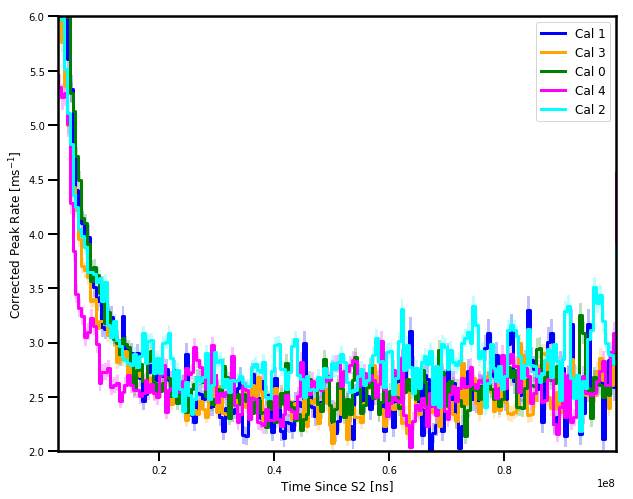

In [134]:
#Plots corrected event with error added#
colours=['blue', 'orange', 'green', 'magenta', 'cyan', 'red', 'grey', 'black', 'brown']
plt.figure(figsize=(10, 8))
index=0
window_length=10**8
_tpoints=np.linspace(0, window_length, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
index=0

for source, dict_data in dict_bkg_calibrations.items():
    print(source, len(dict_data))
    del events_hist
    #del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            weight_hist+=data['deltat_weights']
            livet_hist+=data['livet_hist']
            livet_weight+=data['livet_weights']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            weight_hist=data['deltat_weights']
            livet_hist=data['livet_hist']
            livet_weight=data['livet_weights']
            events=data['events']
        except KeyError:
            print(source, key)
        
    events_hist=events_hist.sum('s2_area')
    weight_hist=weight_hist.sum('s2_area')
    livet_hist=livet_hist.sum('s2_area')
    livet_weight=livet_weight.sum('s2_area')
    
    #Error
    num_value=np.array(events_hist)
    denum_value=np.array(livet_hist)
    num_error = np.sqrt(weight_hist)
    denum_error = np.sqrt(livet_weight)
    e1 = num_error
    e2 = denum_error
    b1 = num_value
    b2 = denum_value
    w=b1/b2
    
    ratio_error = np.abs(((1-2*w)*e1*e1 + w*w*e2*e2)/(b2*b2))       
    ratio = num_value/denum_value 
    
    #Confidence Bands
    x = _tpoints
    x = np.sort(np.array(list(x[1:]) + list(x[:-1])))
    y1=ratio-np.sqrt(ratio_error)
    y2=ratio+np.sqrt(ratio_error)
    y_lower = np.repeat(y1[:], 2)
    y_upper = np.repeat(y2[:], 2)
        
    #Plot
    plt.step(_tpoints[1:], ratio*1000000, linewidth=3,  color=colours[index], label=source)
    plt.fill_between(x, y_lower*1000000, y_upper*1000000, facecolor=colours[index], interpolate=True, alpha = 0.25)
    index+=1
    
    print(events)

plt.xlim([_tpoints[5], _tpoints[-2]])
plt.ylim([2.0, 6])
plt.xlabel('Time Since S2 [ns]', fontsize=12)
plt.ylabel('Corrected Peak Rate [ms$^{-1}$]', fontsize=12)
axes = plt.gca()
axes.tick_params(width=2, length=10)
plt.legend(loc='best', fontsize=12)
#plt.savefig("fig_deltat_example.png", bboxes='tight')
#plt.savefig("fig_deltat_example.pdf", bboxes='tight')
#plt.yscale('log')
plt.show()

From background seems different "rates" between different radon and krypton calibrations much more likely to be correlated to different "valve" conditions than enything else

### Nxxt up look at individual energy lines to check decay of single electron rate. Also remove AFT values and reprocess pkl files

In [ ]:
###TODO!!!!! NOrmalize next 3 cells by number of S2s of given size

In [ ]:
##Live Time Corrected 2d Plots##

#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
livet_hist=0
events=0
plt.set_cmap("Oranges")

_s2bins=50
_tbins=200
for source, dict_data in dict_source.items():
    print(source, len(dict_data))
    plt.figure(figsize=(10, 8))
    del events_hist
    del livet_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            livet_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            livet_hist=data['livet_hist']
            events=data['events']
    
    
    blank_hist=events_hist.similar_blank_histogram()
    for idt in range(_tbins):
        for ids2 in range (_s2bins):
            #blank_hist[idt][ids2]=
            bin_content=events_hist[idt][ids2]/livet_hist[idt][ids2]
            if np.isnan(bin_content):
                blank_hist[idt][ids2]=0
            else:
                blank_hist[idt][ids2]=bin_content
    
    blank_hist=blank_hist*10**6 #ms adjustment
    blank_hist.plot(cblabel = 'Corrected Event Rate [ms$^{-1}$.S2$^{-1}$]', vmax=1*10**1, vmin =0)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate_corrected.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate_corrected.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['deltat']
            events+=data['events']
        except NameError:
            events_hist=data['deltat']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_rate.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_rate.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
events_hist=0
events=0
plt.set_cmap("Oranges")
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del events_hist
    events=0
    for key, data in dict_data.items():
        try:
            events_hist
            events_hist+=data['livet_hist']
            events+=data['events']
        except NameError:
            events_hist=data['livet_hist']
            events=data['events']
    
    new_hist=events_hist/events
    new_hist.plot(cblabel = 'Live Time Fraction [bin$^{-1}$.S2$^{-1}$]', norm=LogNorm(), vmin=10**-6, vmax=10**-2)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('S2 Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_livetime.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_livetime.pdf" %source, bboxes='tight')
    plt.show()    

   
    #new_hist.plot(label=source, color=colours[index])
    #index+=1


In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_xmax=10**8
_tpoints=np.linspace(0, _xmax, 201)
_xmin=_tpoints[1]
_ymax=1.7e-7
peaks_hist=0
events=0
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 8))
    del peaks_hist
    events=0
    for key, data in dict_data.items():
        try:
            peaks_hist
            peaks_hist+=data['peaks']
            events+=data['events']
        except NameError:
            peaks_hist=data['peaks']
            events=data['events']
    
    new_hist=peaks_hist/events
    new_hist.plot(cblabel = 'Uncorrected Events [ns$^{-1}$]' ,norm=LogNorm(), vmin=10**-11, vmax=10**-7)
    plt.xlabel('Time Since S2 [ns]', fontsize=12)
    plt.ylabel('Peak Size [Log10(PE)]', fontsize=12)
    #plt.savefig("fig_%s_2d_peaks.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_2d_peaks.pdf" %source, bboxes='tight')
    plt.show()    

   


### Position Correlation Stuff

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green', 'red', 'magenta', 'cyan']
index=0
_ymin=2*10**-3
_xmax=(47.9)**2
_rpoints=np.linspace(0, (R_tpc)**2, 101)
_ymax=0.8*10**0
r2_hist=0
for source, dict_data in dict_source.items():
    plt.figure(figsize=(10, 4))
    print(source, len(dict_data))
    del r2_hist
    events=0
    for key, data in dict_data.items():
        #print(key)
        try:
            r2_hist
            r2_hist+=data['dt_r2']
            events+=data['events']
        except NameError:
            r2_hist = data['dt_r2']
            events=data['events']
      
    new_hist=r2_hist
    new_hist=new_hist/events
    new_hist=new_hist.sum('delta_T')
    new_hist.plot(label=source, color='blue')
    
    random_comp = dfs_source_distrib_hist[source]['alpha']
    r_norms = dfs_source_distrib_hist[source]['r_norms']

    content, bins = np.histogram(random_comp[:, 0]**2, weights=1/r_norms, bins=100, range=[0, (R_tpc)**2])
    scaling_factor=np.sum(new_hist[:])/np.sum(content)
    plt.hist(random_comp[:, 0]**2, weights=scaling_factor/r_norms, range=[0, (R_tpc)**2], bins=100, 
             histtype='stepfilled', linewidth=2, label='%s Sim' %source, color='green', alpha=0.5)
    #print(np.nansum(random_comp[:,0]**2/r_norms))
    
    
    #event_max=np.max(new_hist)
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")
   
    idx=1
    for bin_value in new_hist[1:]:
        if bin_value<(content[idx]*scaling_factor):
            plt.vlines(_rpoints[idx], 0, _ymax, color='red', 
                       linestyle="dashed", label='%.2f cm' %float(np.sqrt(_rpoints[idx])))
            break
        idx+=1
    
    plt.xlim([0, _xmax])
    plt.ylim([_ymin, _ymax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.100ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.yscale('log')
    #plt.savefig("fig_%s_r_dependence_100ms.png" %source, bboxes='tight')
    #plt.savefig("fig_%s_r_dependence_100ms.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
#t_bins=[0, 5*10**8, 2*10**9]
livet_tbin_width=0.5*10**6
t_bins=np.linspace(0, 1.5*10**8, 7)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            livet_hist+=data['livet_hist']  
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            livet_hist = data['livet_hist']  
            events = data['events']
 
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):      
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = np.floor(start_time/(livet_tbin_width))
        stop_bin  = np.floor(stop_time/(livet_tbin_width))
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        
        
        new_hist=new_hist/livet_correction
        new_hist.plot(label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
                    

    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm2]', fontsize=12)
    plt.ylabel('Normalized Peaks [cm$^{-2}$.ms$^{-1}$]', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([4*10**-1, 3*10])
    plt.yscale('log')
    plt.savefig("fig_%s_r_dep_timeslices.png" %source, bboxes='tight')
    plt.savefig("fig_%s_r_dep_timeslices.pdf" %source, bboxes='tight')
    plt.show()


In [ ]:
t_bins=np.linspace(0, 1*10**8, 5)
_xmax=(R_tpc)**2
r_bins=np.linspace(0, (R_tpc)**2, 101)
for source, dict_data in dict_source.items():
    print(source)
    plt.figure(figsize=(10, 4))
    dt_r2_hist=0
    livet_hist=0
    events=0
    del dt_r2_hist
    del livet_hist
    for key, data in dict_data.items():
        try:
            dt_r2_hist
            dt_r2_hist+=data['dt_r2'] 
            livet_hist+=data['livet_hist']  
            events+=data['events']
        except NameError:
            dt_r2_hist = data['dt_r2']
            livet_hist = data['livet_hist']  
            events = data['events']
 
    livet_hist=livet_hist.sum('s2_area')
    for index, delta_t in enumerate(t_bins[::2]):
        #Time Slice Hist
        start_time = t_bins[index]
        stop_time  = t_bins[index+1]
        #print(start_time, stop_time)
        new_hist=dt_r2_hist.slicesum(start=start_time, stop=stop_time,axis='delta_T')

        #Livetime in slice
        start_bin = np.floor(start_time/(livet_tbin_width))
        stop_bin  = np.floor(stop_time/(livet_tbin_width))
        livet_correction = np.average(livet_hist[start_bin:stop_bin])
        #print(start_bin, stop_bin, livet_correction)        
        
        new_hist=new_hist/livet_correction
        
        #Reference time window hist
        ref_start_time=t_bins[-2]
        ref_stop_time=t_bins[-1]
        #print(ref_start_time, ref_stop_time)
        ref_hist=dt_r2_hist.slicesum(start=ref_start_time, stop=ref_stop_time,axis='delta_T')
        
        #Livetime in reference slice
        ref_start_bin = np.floor(ref_start_time/(livet_tbin_width))
        ref_stop_bin  = np.floor(ref_stop_time/(livet_tbin_width))
        ref_livet_correction = np.average(livet_hist[ref_start_bin:ref_stop_bin])
        #print(ref_start_bin, ref_stop_bin, ref_livet_correction)  
        ref_hist=ref_hist/ref_livet_correction

        #Difference Hist
        diff_hist=(new_hist-ref_hist)/ref_hist
        diff_hist.plot(label='%d - %d ms'%(start_time/10**6, stop_time/10**6))
             
        #const_std=np.std(diff_hist[25:75])
        #const_ave=np.average(diff_hist[25:75])
        plt.hlines(0, 0, _xmax, color='r', linestyle=":")
        #plt.fill_between(r_bins, [const_ave-const_std]*len(r_bins), [const_ave+const_std]*len(r_bins),alpha=0.25,facecolor=colours[index])
        #print(const_std, )
        
        
        #new_hist.plot(label=index)
    plt.xlim([0, _xmax])
    plt.xlabel('Distance [cm$^{2}$]', fontsize=12)
    plt.ylabel('Relative Difference', fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.ylim([-0.35, 1])
    #plt.yscale('log')
    plt.savefig("fig_%s_r_diff_timeslices.png" %source, bboxes='tight')
    plt.savefig("fig_%s_r_diff_timeslices.pdf" %source, bboxes='tight')
    plt.show()


### X/Y Slixes

In [ ]:
_spatial_bins=50
_xbins=np.linspace(-50, 50, _spatial_bins+1)
_ybins=np.linspace(-50, 50, _spatial_bins+1)
xv, yv = np.meshgrid(_xbins, _ybins)
array_hist = np.zeros((_spatial_bins, _spatial_bins))
xc = np.zeros_like(array_hist)
yc = np.zeros_like(array_hist)

r_lower=15
r_upper=20
key_search=[]

for idx, x_edge in tqdm(enumerate(xv[:-1])):
    for idy, y_edge in enumerate(yv[:-1]):
        xc[idx, idy]=xv[idx][idy]+(xv[idx][idy+1]-xv[idx][idy])/2
        yc[idx, idy]=yv[idx][idy]+(yv[idx+1][idy]-yv[idx][idy])/2
        
        rc = np.sqrt(xc[idx, idy]**2+yc[idx, idy]**2)
        
        if rc>r_lower and rc<r_upper:
            key_search.append('%d_%d' %(xc[idx, idy], yc[idx, idy]))

In [ ]:
%%time
print('Data')
#simpath= '/scratch/midway2/jpienaar/cache_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*xy.pkl', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

dicts_datasets_rn_xy={}
dicts_datasets_kr_xy={}
dicts_datasets_bkg_xy={}
for dataset in tqdm(datasets[:]):
    #print(key)
    key=dataset[:-7]
    if dataset_names_rn.isin([dataset[:-7]]).any():
        #print('Radon')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_rn_xy[key]=xy_hist
        del data_dict
            
    if dataset_names_kr.isin([dataset[:-7]]).any():
        #print('Krypton')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_kr_xy[key]=xy_hist
        del data_dict
            
    if dataset_names_bkg.isin([dataset[:-7]]).any():
        #print('Bkg')
        xy_hist=0
        with open(simpath+dataset, 'rb') as handle:
            data_dict = pickle.load(handle)
            del xy_hist
            for pos_key in data_dict.keys():
                if pos_key in key_search:
                    #print('True', data_dict[pos_key]['xy'].n)
                    try:
                        xy_hist
                        xy_hist+=data_dict[pos_key]['xy']
                    except NameError:
                        xy_hist = data_dict[pos_key]['xy']
        #print(xy_hist.n)
        dicts_datasets_bkg_xy[key]=xy_hist
        del data_dict
  
#df_PI=pd.concat(df_PI)

In [ ]:
dict_source_xy={'Radon' : dicts_datasets_rn_xy, 'Krypton': dicts_datasets_kr_xy, 'Background' : dicts_datasets_bkg_xy}

In [ ]:
#plt.figure(figsize=(10, 8))
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
t_bins=np.linspace(0, 2*10**8, 5)
for source, dict_data in dict_source_xy.items():
    numrows=1
    numcols=len(t_bins)-2
    plt.figure(figsize=(10*numcols, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    for index, delta_t in enumerate(t_bins[::2]):
        plt.subplot2grid((numrows,numcols), (0, index))
        ax = plt.gca()
        circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
        ax.add_artist(circle1)
        
        slice_hist=new_hist.slicesum(start=t_bins[index], stop=t_bins[index+1],axis='delta_T')
        slice_hist.plot(norm=LogNorm(), cblabel='Normalized Entries', vmin=5*10**-11, vmax=5*10**-9)
        plt.xlabel('X  [cm]', fontsize=12)
        plt.ylabel('Y  [cm]', fontsize=12)


    plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


In [ ]:
numcols
np.floor(len(t_bins)/2)

In [ ]:
#plt.figure(figsize=(10, 8))
colours=['blue', 'orange', 'green']
index=0
_ymin=10**-3
_xmax=(2*47.9)**2
_rpoints=np.linspace(0, (2*R_tpc)**2, 101)
_ymax=10
xy_hist=0
for source, dict_data in dict_source_xy.items():
    plt.figure(figsize=(10, 8))
    print(source)
    if source=='Background':
        continue
    del xy_hist
    for key, data in dict_data.items():
        #print(key)
        try:
            xy_hist
            xy_hist+=data
        except NameError:
            xy_hist = data
            
    new_hist=xy_hist
    new_hist=new_hist/len(dict_data)
    
    #plt.hlines(0.1*event_max, 0, _xmax, color=colours[index], linestyle=":")

    ax = plt.gca()
    circle1 = plt.Circle((0, 0),  r_lower, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    circle1 = plt.Circle((0, 0),  r_upper, color='red', fill=False, linewidth=3, linestyle=':')
    ax.add_artist(circle1)
    
    new_hist=new_hist.slicesum(start=1*10**8, stop=2*10**8,axis='delta_T')
    print(np.average(new_hist))
    new_hist.plot(label=source, norm=LogNorm())
    index+=1

#plt.xlim([0, _xmax])
#plt.ylim([_ymin, _ymax])
    plt.xlabel('X  [cm]', fontsize=12)
    plt.ylabel('Y  [cm]', fontsize=12)
#plt.legend(loc='best', fontsize=12)
#plt.yscale('log')
    #plt.savefig("fig_%s_%i_peaks_xy.png" %(source, r_lower), bboxes='tight')
    #plt.savefig("fig_%s_%i_peaks_xy.pdf" %(source, r_lower), bboxes='tight')
    plt.show()


### Testing R normalization

In [ ]:
#Uniform Distrib
coords=np.random.random([100000, 2])
new_array=[]
closed_array=[]
open_array=[]
alpha_array=[]
r_norms=[]
s2_ypos=20
s2_xpos=-23
rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
for pos in coords:
    xpos=R_tpc*(2*pos[0]-1)
    ypos=R_tpc*(2*pos[1]-1)
    if (ypos**2+xpos**2)>R_tpc**2:
        continue
    else:
        xpos=R_tpc*(2*pos[0]-1)
        ypos=R_tpc*(2*pos[1]-1)
        new_array.append([xpos, ypos])
        
        r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
        alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
        r_norm = (alpha/np.pi)
        if np.isnan(alpha):
            alpha=-1
            r_norm=1
            closed_array.append([xpos, ypos])
        elif alpha>0.5*np.pi:
            open_array.append([xpos, ypos])
        new_array.append([xpos, ypos])
        alpha_array.append([r_dist, alpha])
        r_norms.append(r_norm)
        
      

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(new_array[:, 0], new_array[:, 1])
plt.scatter(closed_array[:, 0], closed_array[:, 1])
plt.scatter(open_array[:, 0], open_array[:, 1])
plt.scatter(s2_xpos, s2_ypos, color='r', s=20)
plt.xlabel('X  [cm]', fontsize=12)
plt.ylabel('Y  [cm]', fontsize=12)
#plt.savefig('fig_r_norm_illustration.png')

In [ ]:
%%time
#Load Data To Sample From

print('Radon Data')
#simpath= '/home/jpienaar/Test_files/'
simpath= '/scratch/midway2/jpienaar/cache_files/'

#Find datasets
datasets = get_file_list(simpath, '*Pre_trigger.hdf5', ' ')
print('Found %d datasets' % len(datasets))
n_files=len(datasets)

datasets_rn=[]
datasets_kr=[]
datasets_bkg=[]
for dataset in tqdm(datasets[:]):
    run_number=dataset[:-17]
    if dataset_names_rn.isin([run_number]).any():
        while len(datasets_rn)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_rn.append(df)
            
    elif dataset_names_bkg.isin([run_number]).any():
        while len(datasets_bkg)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_bkg.append(df)
            
    elif dataset_names_kr.isin([run_number]).any():
        while len(datasets_kr)<10:
            cache_file_name = '/scratch/midway2/jpienaar/cache_files/'+run_number+ '_Pre_trigger.hdf5'
            #print (run_number, cache_file_name)
            df = hax.minitrees.load(cache_file = cache_file_name)
            datasets_kr.append(df)
              
    
datasets_rn=pd.concat(datasets_rn)
datasets_kr=pd.concat(datasets_kr)
datasets_bkg=pd.concat(datasets_bkg)

In [ ]:
dfs_source_distrib={'Background': {'data':datasets_bkg},
                    'Radon': {'data': datasets_rn},
                    'Krypton': {'data': datasets_kr}}

In [ ]:
#Distrib from Data
dfs_source_distrib_hist={}
sample_num=1000
for key, source in dfs_source_distrib.items():
    print(key)
    df=source['data']
    alpha_array=[]
    r_norms=[]
    unique_y=pd.unique(df['y_s2_tpf'].values)
    unique_x=pd.unique(df['x_s2_tpf'].values)
    unique_events=[[x, y] for x, y in zip(unique_x, unique_y)]
    sampled_df=df.filter(['x_p_tpf','y_p_tpf'])
    sampled_df=sampled_df.sample(sample_num)
    for unique_s2 in tqdm(unique_events[:sample_num]):
        s2_ypos=unique_s2[1]
        s2_xpos=unique_s2[0]
        rpos=np.sqrt(s2_xpos**2+s2_ypos**2)
        for peak_key, peak in sampled_df.iterrows():
            xpos=peak['x_p_tpf']
            ypos=peak['y_p_tpf']
            new_array.append([xpos, ypos])

            r_dist=np.sqrt((xpos-(s2_xpos))**2+(ypos-(s2_ypos))**2)
            alpha = np.arccos((r_dist**2+rpos**2-R_tpc**2)/(2*rpos*r_dist))
            r_norm = (alpha/np.pi)
            if np.isnan(alpha):
                alpha=-1
                r_norm=1
            alpha_array.append([r_dist, alpha])
            r_norms.append(r_norm)

    alpha_array=np.array(alpha_array)
    r_norms=np.array(r_norms)
    dfs_source_distrib_hist[key]={'alpha': alpha_array, 'r_norms': r_norms}

In [ ]:
plt.figure(figsize=(10, 8))
for key, source in dfs_source_distrib_hist.items():
    alpha_array=source['alpha']
    r_norms=source['r_norms']
    print(key,len(alpha_array), len(r_norms))
    plt.hist(alpha_array[:, 0]**2, weights=1/r_norms, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2, label=key)
    #plt.vlines((R_tpc-rpos)**2, 0, 5000)
    #plt.vlines((R_tpc+rpos)**2, 0, 5000)
plt.yscale('log')
plt.xlim([0, (2*R_tpc)**2])
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
plt.legend(loc='best')
#plt.savefig('fig_r2_norm_illustration_weighted.png')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(alpha_array[:, 0]**2, range=[0, (2*R_tpc)**2], bins=100, histtype='step', linewidth=2)
#plt.vlines((R_tpc-rpos)**2, 0, 5000)
#plt.vlines((R_tpc+rpos)**2, 0, 5000)
#plt.ylim([0, 5000])
plt.yscale('log')
plt.ylabel('Normalized Events [cm$^{-2}$]', fontsize=12)
plt.xlabel('R  [cm$^{2}$]', fontsize=12)
#plt.savefig('fig_r2_norm_illustration.png')

plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(alpha_array[:, 0], r_norms)

### Search for Photo-Ionization events ###

In [ ]:
#plt.set_cmap('viridis')
plt.clf()
_xbins=np.linspace(700, 800, 100)
_ybins=np.linspace(0, 5, 100)
plt.figure(figsize=(30, 8))
numrows=1
numcols=2
gridspec.GridSpec(numrows, numcols)
index=0
for key, df in dict_datasets.items():
    print(key)
    plt.figure(figsize=(20, 8))
    
    #Time delay from S1
    plt.subplot2grid((numrows, numcols), (index, 0))
    plt.hist2d((df['drift_time']+df['time_since_s2'])/1000,       #us         
               df['se_range_50p_area']/1000,                      #us
               bins =[_xbins, _ybins], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('Time delay from main S1 [$\mu$s]')
    plt.ylabel('Peak Width [$\mu$s]')
    
    #Time delay from S2
    plt.subplot2grid((numrows, numcols), (index, 1))
    plt.plot(_xbins, cut_line(_xbins, 0.35, 0), color='r', linewidth=5)
    plt.hist2d((df['time_since_s2'])/1000,       #us         
               df['se_range_50p_area']/1000,                      #us
               bins =[_xbins, _ybins], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('Time delay from main S2 [$\mu$s]')
    plt.ylabel('Peak Width [$\mu$s]')
    
    plt.show()
#fig.tight_layout()
#fig.show()

In [ ]:
#Based on cuts from previous plot, select photo ionization events from gate
dict_gate_pi={}
for key, df in dict_datasets.items():
    df_gate_pi = hax.cuts.selection(df, df['se_range_50p_area']>cut_line(df['time_since_s2'], 0.35, 0), 'Cut Line')
    df_gate_pi = hax.cuts.range_selection(df_gate_pi, 'time_since_s2', [2500, 6000])
    dict_gate_pi[key]=df_gate_pi

In [ ]:
#plt.set_cmap('viridis')
plt.clf()
_xbins=np.linspace(0, 300000, 100)
_ybins=np.linspace(0, 30000, 100)
_relbins=np.linspace(0, 0.2, 100)
_driftbins=np.linspace(0, 50, 100)
_widthbins=np.linspace(0, 6, 100)
index=0
for key, df in dict_gate_pi.items():
    
    df = hax.cuts.selection(df, df['area']>1500, 'Peak Size Selection')
    
    print(key)
    numrows=1
    numcols=3
    fig=plt.figure(figsize=(10*numcols, 8*numrows))
    gridspec.GridSpec(numrows, numcols)
    
    #Relative Size compared to primary S2
    plt.subplot2grid((numrows, numcols), (index, 0))
    plt.hist2d((df['s2']),       #ep         
               df['area']/df['s2'],       #pe
               bins =[_xbins, _relbins], #norm=LogNorm(), vmin=1,
               )
    plt.colorbar()
    plt.xlabel('S2 [pe]')
    plt.ylabel('Peak Area/S2 Size')
    
    #Primary S2 compared to peak width
    plt.subplot2grid((numrows, numcols), (index, 1))
    plt.hist2d(df['s2'],       #ep         
               df['se_range_50p_area']/1000,       #pe
               bins =[_xbins, _widthbins], norm=LogNorm(), vmin=1,
               )
    plt.colorbar()
    plt.xlabel('S2 Size [pe]')
    plt.ylabel('Peak Width [$\mu$s]')
    
    #Drift time of event
    plt.subplot2grid((numrows, numcols), (index, 2))
    plt.hist2d(df['drift_time']/1000,       #ep         
               df['area'],       #pe
               bins =[_driftbins, _ybins], norm=LogNorm(), vmin=1,
               )
    plt.colorbar()
    plt.xlabel('Drift_Time [$\mu$s]')
    plt.ylabel('Peak Area [pe]')
    
    ax1=plt.gca()
    ax2=ax1.twinx()
    ax2.hist(df['drift_time']/1000, bins=_driftbins, color='r', histtype='step', linewidth=3, log=True)
    ax2.set_ylabel('Counts', color = 'r')
    ax2.tick_params(axis='y', colors='r')

 
    
    plt.show()
fig.tight_layout()
#fig.show()

In [ ]:
plt.clf()
_xbins=np.linspace(-50, 50, 100)
_ybins=np.linspace(-50, 50, 100)
_channelbins=np.linspace(0, 100, 101)
for key, df in dict_gate_pi.items():
    
    df = hax.cuts.selection(df, df['area']>1500, 'Peak Size Selection')
    
    print(key)
    numrows=1
    numcols=2
    fig=plt.figure(figsize=(10*numcols, 8*numrows))
    gridspec.GridSpec(numrows, numcols)
    
    #X-Y Distribution
    plt.subplot2grid((numrows, numcols), (index, 0))
    plt.hist2d((df['x_se']),       #ep         
               df['y_se'],       #pe
               bins =[_xbins, _ybins], norm=LogNorm(), vmin=1,
               )
    plt.colorbar()
    plt.xlabel('X [cm]')
    plt.ylabel('Y [cm]')
    
    
    #N Channels
    plt.subplot2grid((numrows, numcols), (index, 1))
    plt.hist(df['n_contributing_channels'],
               bins=_channelbins
               )
    plt.colorbar()
    plt.xlabel('Channels [#]')
    plt.ylabel('Counts [#]')
    
   
    plt.show()
fig.tight_layout()
#fig.show()

In [ ]:
%%time
# Determine number of waveforms in each data sample
for key, df in dict_gate_pi.items():
    df = hax.cuts.selection(df, df['area']>1500, 'Peak Size Selection')
    files = df['run_number'].unique()
    count = 0
    for run in files:
        df_run= df.loc[df['run_number']==run]
        count+=len(df_run['event_number'].unique())
    print(key, count)

### Look at Width of Peaks ###

In [ ]:
plt.set_cmap('viridis')
plt.figure(figsize=(30, 8))
#numrows=3
#numcols=1
#gridspec.GridSpec(numrows, numcols)
#index=0
for key, dataset in datasets.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #plt.subplot2grid((numrows, numcols), (index, 0))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['drift_time'], dataset['s2_range_50p_area'], bins =[100, 100], range=[[0, 750000], [0, 2500]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('S2 Drift Time [$\mu$s]')
    plt.ylabel('S2 Width [ns]')
    plt.show()
#fig.tight_layout()
#fig.show()

In [ ]:
def cut_line(x, m, c):
    return m*x+c

In [ ]:
#plt.set_cmap('viridis')
for key, dataset in datasets.items():
    print(key)
    plt.figure(figsize=(10, 8))
    x_hits = np.linspace(0, 15000, 100)
    plt.plot(x_hits, cut_line(x_hits, 2, -1000), color='r', linewidth=5)
    #plt.plot(x_hits, cut_line(x_hits, 0.3, -200), color='g', linewidth=5)
    plt.hist2d(dataset['n_hits'], dataset['se_range_50p_area'], bins =[100, 100], range=[[0, 20000], [0, 10000]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('Hits')
    plt.ylabel('SE Width [ns]')
    plt.savefig('All_peaks_line.png')
    plt.show()

In [ ]:
datasets_hits_small={}
datasets_hits_large={}
for key, dataset in datasets.items():
    print(key)
    dataset_small=hax.cuts.selection(dataset, dataset['se_range_50p_area']<cut_line(dataset['n_hits'], 2, -1000), 'n_hits Selection small')
    dataset_large=hax.cuts.selection(dataset, dataset['se_range_50p_area']>cut_line(dataset['n_hits'], 2, -1000), 'n_hits Selection large')
    datasets_hits_small.update({key:dataset_small})
    datasets_hits_large.update({key:dataset_large})

In [ ]:
for key, dataset in datasets_hits_small.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['drift_time']+dataset['time_since_s2'], dataset['se_range_50p_area'], bins =[100, 100], range=[[0, 2000000], [0, 5000]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('SE Drift Time [ns]')
    plt.ylabel('SE Width [ns]')
    plt.savefig('Large_n_hits.png')
    plt.show()

In [ ]:
len(data_bkg.event_number.unique())

In [ ]:
len(datasets_hits_small['bkg'])

In [ ]:
datasets_tmp={}
for key, dataset in datasets_hits_small.items():
    print(key)
    dataset_tmp=hax.cuts.selection(dataset, dataset['type']=='s2', 'S2 Selection')
    dataset_tmp=hax.cuts.selection(dataset, dataset['drift_time']+dataset['time_since_s2']<745000, 'Drift not in TPC')
    datasets_tmp.update({key:dataset_tmp})

In [ ]:
for key, dataset in datasets_tmp1.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['r_s2']**2, dataset['time_since_s2'], bins=[100, 100], range=[[0, 50**2], [0, 400000]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('R^2 S2  [cm^2]')
    plt.ylabel('Time Since S2 [ns]')
    #plt.savefig('Large_n_hits.png')
    plt.show()

In [ ]:
for key, dataset in datasets_tmp1.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['x_s2'], dataset['y_s2'], bins=[100, 100], range=[[-55, 55], [-55, 55]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('X [cm]')
    plt.ylabel('Y [cm]')
    #plt.savefig('Large_n_hits.png')
    plt.show()

In [ ]:
%%capture
for key, dataset in datasets_tmp.items():
    xspace=np.linspace(-50, 50, 21)
    yspace=np.linspace(-50, 50, 21)
    xbins = xspace[:-1]+(xspace[1:]-xspace[:-1])/2
    ybins = yspace[:-1]+(yspace[1:]-yspace[:-1])/2
    x_pos=[]
    y_pos=[]
    x_disp=[]
    y_disp=[]
    color_scale=[]
    for x_index in range(len(xspace)-1):
        data_slice_x = hax.cuts.selection(dataset, dataset['x_s2']>xspace[x_index], 'X LowerBound')
        data_slice_x = hax.cuts.selection(data_slice_x, data_slice_x['x_s2']<xspace[x_index+1], 'X UpperBound')
        #x_series=[]
        #y_series=[]
        x_ave=[]
        y_ave=[]
        for y_index in range(len(yspace)-1):
            print(x_index, y_index)
            data_slice_y = hax.cuts.selection(data_slice_x, data_slice_x['y_s2']>yspace[y_index], 'Y LowerBound')
            data_slice_y = hax.cuts.selection(data_slice_y, data_slice_y['y_s2']<yspace[y_index+1], 'Y UpperBound')

            x_vector = data_slice_y.x_se - data_slice_y.x_s2
            y_vector = data_slice_y.y_se - data_slice_y.y_s2
            rad_disp = data_slice_y.r_se - data_slice_y.r_s2
            color_scale.append(np.mean(rad_disp))
            x_disp.append(np.mean(x_vector))
            y_disp.append(np.mean(y_vector))
            x_pos.append(xbins[x_index])
            y_pos.append(ybins[y_index])


In [ ]:
print(len(x_pos))
plt.figure(figsize=(10, 10))
#    color_scale=dataset.r_se-dataset.r_s2
Q=plt.quiver(x_pos, y_pos, x_disp, y_disp, color_scale, units='x', pivot='tail', angles='xy', scale_units='xy', scale=1)
cb=plt.colorbar(Q)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.savefig('Rad_disp.png')
plt.show()

In [ ]:
for key, dataset in datasets_hits_large.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['time_since_s2'], dataset['se_range_50p_area'], bins =[100, 100], range=[[0, 3000000], [0, 50000]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('Time Since S2 [ns]')
    plt.ylabel('SE Width [ns]')
    #plt.savefig('Large_n_hits.png')
    plt.show()

In [ ]:
datasets_tmp4={}
for key, dataset in datasets_hits_large.items():
    print(key)
    dataset_tmp=hax.cuts.selection(dataset, dataset['type']=='s2', 'S2 Selection')
    dataset_tmp=hax.cuts.selection(dataset, dataset['time_since_s2']>745000, 'Drift not in TPC')
    datasets_tmp4.update({key:dataset_tmp})

In [ ]:
for key, dataset in datasets_tmp4.items():
    print(key)
    plt.figure(figsize=(10, 8))
    #dataset = hax.cuts.selection(data_radon_sr1,  data_radon_sr1['n_hits']<100, 'SE Selection')
    plt.hist2d(dataset['x_se'], dataset['y_se'], bins=[100, 100], range=[[-50, 50], [-50, 50]], norm=LogNorm(), vmin=1)
    plt.colorbar()
    plt.xlabel('R^2 S2  [cm^2]')
    plt.ylabel('Time Since S2 [ns]')
    #plt.savefig('Large_n_hits.png')
    plt.show()

In [ ]:
%%capture
for key, dataset in datasets_tmp4.items():
    xspace=np.linspace(-50, 50, 21)
    yspace=np.linspace(-50, 50, 21)
    xbins = xspace[:-1]+(xspace[1:]-xspace[:-1])/2
    ybins = yspace[:-1]+(yspace[1:]-yspace[:-1])/2
    x_pos=[]
    y_pos=[]
    x_disp=[]
    y_disp=[]
    color_scale=[]
    for x_index in range(len(xspace)-1):
        data_slice_x = hax.cuts.selection(dataset, dataset['x_s2']>xspace[x_index], 'X LowerBound')
        data_slice_x = hax.cuts.selection(data_slice_x, data_slice_x['x_s2']<xspace[x_index+1], 'X UpperBound')
        #x_series=[]
        #y_series=[]
        x_ave=[]
        y_ave=[]
        for y_index in range(len(yspace)-1):
            print(x_index, y_index)
            data_slice_y = hax.cuts.selection(data_slice_x, data_slice_x['y_s2']>yspace[y_index], 'Y LowerBound')
            data_slice_y = hax.cuts.selection(data_slice_y, data_slice_y['y_s2']<yspace[y_index+1], 'Y UpperBound')

            x_vector = data_slice_y.x_se - data_slice_y.x_s2
            y_vector = data_slice_y.y_se - data_slice_y.y_s2
            rad_disp = data_slice_y.r_se - data_slice_y.r_s2
            color_scale.append(np.mean(rad_disp))
            x_disp.append(np.mean(x_vector))
            y_disp.append(np.mean(y_vector))
            x_pos.append(xbins[x_index])
            y_pos.append(ybins[y_index])


In [ ]:
print(len(x_pos))
plt.figure(figsize=(10, 10))
#    color_scale=dataset.r_se-dataset.r_s2
Q=plt.quiver(x_pos, y_pos, x_disp, y_disp, color_scale, units='x', pivot='tail', angles='xy', scale_units='xy', scale=1)
cb=plt.colorbar(Q)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.show()

In [ ]:
#plt.set_cmap('viridis')
plt.figure(figsize=(10, 8))
dataset_below = hax.cuts.selection(dataset,  dataset['se_range_50p_area']<500, 'SE Width Population')
(bins_below, dump, d) = plt.hist(dataset_below['time_since_s2'], bins =100, range=[0, 6000000])
plt.yscale('log')

plt.show()

In [ ]:
#plt.set_cmap('viridis')
plt.figure(figsize=(10, 8))
dataset_above = hax.cuts.selection(dataset,  dataset['se_range_50p_area']>500, 'SE Width Population')
(bins_above, dump, d)=plt.hist(dataset_above['time_since_s2'], bins =100, range=[0, 6000000])
plt.yscale('log')

plt.show()

In [ ]:
#bins_above/bins_below
plt.plot(dump[:-1], bins_above/bins_below)
plt.show()

In [ ]:
#plt.set_cmap('viridis')
plt.figure(figsize=(10, 8))
dataset_tmp = hax.cuts.range_selection(dataset_below, 'x_s2', [-17, -13])
dataset_tmp = hax.cuts.range_selection(dataset_tmp, 'y_s2', [-17, -13])
plt.hist2d(dataset_tmp['x_se'], dataset_tmp['y_se'], bins =[100, 100], range=[[-50, 50], [-50, 50]], norm=LogNorm(), vmin=1)
plt.colorbar()
plt.show()

In [ ]:
#plt.set_cmap('viridis')
plt.figure(figsize=(10, 8))
dataset_tmp = hax.cuts.range_selection(dataset_above, 'x_s2', [-17, -13])
dataset_tmp = hax.cuts.range_selection(dataset_tmp, 'y_s2', [-17, -13])
plt.hist2d(dataset_tmp['x_se'], dataset_tmp['y_se'], bins =[100, 100], range=[[-50, 50], [-50, 50]], norm=LogNorm(), vmin=1)
plt.colorbar()
plt.show()

In [ ]:
#plt.set_cmap('viridis')
plt.figure(figsize=(10, 8))
plt.hist2d(dataset['r_s2']**2, -dataset['drift_time'], bins =[100, 100], range=[[0, 40**2], [-650000, 0]], norm=LogNorm(), vmin=1)
plt.colorbar()
plt.show()

In [ ]:
#%%capture
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
data_se=dataset
data_se=hax.cuts.selection(data_se, data_se['r_s2']<20, 'RadialSelection')
a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 15)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [40000, 4, 4, 50000, 22, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    a_means.append(popt[1])
    a_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    b_means.append(popt[4])
    b_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
plt.errorbar(time_series[:-1]/1000, a_means[0:], yerr=a_means_error[0:], color='b', label='SR0', ecolor='b', fmt='s')
#plt.errorbar(time_series[:-1]/1000, b_means_sr1[0:], yerr=b_means_error_sr1[0:], color='r', label='SR0', ecolor='r', fmt='s')
#plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='r', label='SR1', ecolor='r', fmt='o')
#plt.errorbar(time_series[1:-1], b_means[1:], yerr=b_means_error[1:], color='b', label='Higher Distribution')
plt.ylim(0, 16)
#plt.xlim(550, 2000)
plt.ylabel('Radial Displacement [cm]')
plt.xlabel('Time Delay [$\mu$s]')
axes=plt.gca()
axes.ticklabel_format(axis='x', style='sci')
plt.savefig('time_delay_displacement.pdf')
plt.savefig('time_delay_displacement.png')
#plt.legend(loc='best')

### Select S2s in small volume. Look at displacement of SEs following ###

In [ ]:
def gauss_2d(data_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta):
    (x, y) = data_tuple
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2)))
    return g.ravel()


In [ ]:
def double_gauss_2d(data_tuple, amp_0, xo, yo, sigma_x0, sigma_y0, theta_0, amp_1, x1, y1, sigma_x1, sigma_y1, theta_1):
    (x, y) = data_tuple
    xo = float(xo)
    yo = float(yo)
    a = (np.cos(theta_0)**2)/(2*sigma_x0**2) + (np.sin(theta_0)**2)/(2*sigma_y0**2)
    b = -(np.sin(2*theta_0))/(4*sigma_x0**2) + (np.sin(2*theta_0))/(4*sigma_y0**2)
    c = (np.sin(theta_0)**2)/(2*sigma_x0**2) + (np.cos(theta_0)**2)/(2*sigma_y0**2)
    d = (np.cos(theta_1)**2)/(2*sigma_x1**2) + (np.sin(theta_1)**2)/(2*sigma_y1**2)
    e = -(np.sin(2*theta_1))/(4*sigma_x1**2) + (np.sin(2*theta_1))/(4*sigma_y1**2)
    f = (np.sin(theta_1)**2)/(2*sigma_x1**2) + (np.cos(theta_1)**2)/(2*sigma_y1**2)
    g = amp_0*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) + c*((y-yo)**2))) 
    + amp_1*np.exp( - (d*((x-x1)**2) + 2*e*(x-x1)*(y-y1) + f*((y-y1)**2)))
    return g.ravel()


In [ ]:
from scipy.optimize import curve_fit

def fit_gauss_2d(initial_guess, counts, xedges, yedges):
    xcenters = xedges[:-1]+(xedges[1:]-xedges[:-1])/2
    ycenters = yedges[:-1]+(yedges[1:]-yedges[:-1])/2
    x_bins, y_bins = np.meshgrid(xcenters, ycenters)
    try:
        popt, pcov = curve_fit(gauss_2d, (x_bins, y_bins), counts.ravel(), p0=initial_guess, maxfev=2500)
        counts_fitted = gauss_2d((x_bins, y_bins), *popt)
        plt.contour(y_bins, x_bins, counts_fitted.reshape(_xbins, _ybins), 3, colors='w')
        return [popt[1], popt[2], pcov[1][1], pcov[2][2]]
    except RuntimeError:
        return [-100, -100, 0, 0] 

    #print("Amplitude A: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    #print("Y Mean: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    #print("Y Sigma: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    #print("X Mean: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    #print("X Sigma: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    
    return [popt[1], popt[2], pcov[1][1], pcov[2][2]]

In [ ]:
from scipy.optimize import curve_fit

def fit_double_gauss_2d(initial_guess, counts, xedges, yedges):
    xcenters = xedges[:-1]+(xedges[1:]-xedges[:-1])/2
    ycenters = yedges[:-1]+(yedges[1:]-yedges[:-1])/2
    x_bins, y_bins = np.meshgrid(xcenters, ycenters)
    try:
        popt, pcov = curve_fit(double_gauss_2d, (x_bins, y_bins), counts.ravel(), p0=initial_guess, maxfev=2500)
        counts_fitted_0 = gauss_2d((x_bins, y_bins), *popt[:6])
        counts_fitted_1 = gauss_2d((x_bins, y_bins), *popt[6:])
        plt.contour(y_bins, x_bins, counts_fitted_0.reshape(_xbins, _ybins), 3, colors='w')
        plt.contour(y_bins, x_bins, counts_fitted_1.reshape(_xbins, _ybins), 3, colors='r')
        
        print("Y0 Mean: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
        print("Y1 Mean: %.4f+/-%.4f" %(popt[7],pcov[7][7]))
        print("X0 Mean: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
        print("X1 Mean: %.4f+/-%.4f" %(popt[8],pcov[8][8]))
        
        return [popt[1], popt[2], popt[7], popt[8]]
    except RuntimeError:
        return [-100, -100, -100, -100] 


In [ ]:
_xpoint = 10
_ypoint = 10
_width = 4
_xbins=40
_ybins=40
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
means=[]
data_xy = hax.cuts.range_selections(data_radon, ('x_s2', (_xpoint-_width/2, _xpoint+_width/2)),
                                    ('y_s2', (_ypoint-_width/2, _ypoint+_width/2)))

time_series = np.linspace(750000, 1750000, 9)
for index in range(len(time_series[:-1])):
    initial_guess=(10,-5,-5,5,5,0,10,15,15,5,5,0)
    
    data_slice=hax.cuts.range_selection(data_xy, 'time_since_s2', (time_series[index], time_series[index+1]))
    (counts, xedges, yedges, Image)=plt.hist2d(data_slice.x_se, data_slice.y_se, bins=[_xbins, _ybins], norm=LogNorm(), range=[_x_range, _y_range], vmin=1)
    plt.colorbar()
    fitvalues=fit_double_gauss_2d(initial_guess, counts, xedges, yedges)
    means.append(fitvalues)
    means_arr=np.array(means)
    means_flat=means_arr.ravel()
    #plt.xlabel('Electrons') 
    #plt.ylabel('Photons')
    #plt.savefig('confined_xy_%i.pdf' %index)
    #plt.savefig('confined_xy_%i.png' %index)
    #plt.legend()
    plt.show()

In [ ]:
%%capture
_xpoints = np.linspace(-10, 10, 6)
_ypoints = np.linspace(-10, 10, 6)

time_series = [0, 250000, 750000, 1250000, 1500000, 175000]
_width = 3
_xbins=40
_ybins=40
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
x_pos1=[]
y_pos1=[]

x_disp=[]
y_disp=[]
for _xpoint in _xpoints:
    for _ypoint in _ypoints:
        print(_xpoint, _ypoint)
        data_xy = hax.cuts.range_selections(data_radon, ('x_s2', (_xpoint-_width/2, _xpoint+_width/2)),
                                            ('y_s2', (_ypoint-_width/2, _ypoint+_width/2)))

        means=[]
        #time_series = np.linspace(700000, 2000000,5)
        for index in range(len(time_series[:-1])):
            initial_guess=(10,_xpoint,_ypoint,5,5,0, 10)

            data_slice=hax.cuts.range_selection(data_xy, 'time_since_s2', (time_series[index], time_series[index+1]))
            (counts, xedges, yedges, Image)=plt.hist2d(data_slice.x_se, data_slice.y_se, bins=[_xbins, _xbins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
            #plt.colorbar()
            fitvalues=fit_gauss_2d(initial_guess, counts, xedges, yedges)
            means.append(fitvalues)
        means_arr=np.array(means)
        means_flat=means_arr.ravel()
        if means_flat[0]==-100 or means_flat[8]==-100:
            x_pos.append(0)
            y_pos.append(0)
            x_disp.append(0)
            y_disp.append(0)
        else:
            y_pos.append(means_flat[0])
            x_pos.append(means_flat[1])
            y_disp.append(means_flat[8]-means_flat[0])
            x_disp.append(means_flat[9]-means_flat[1])
            index+=1


In [ ]:
plt.figure(figsize=(10, 10))
Q=plt.quiver(x_pos, y_pos, x_disp, y_disp)  
plt.xlim(-15, 15)
plt.ylim(-15, 15)

In [ ]:
means_arr=np.array(means)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.plot(time_axis/1000, means_flat[::4],  label='X0 Position', marker='o')
plt.plot(time_axis/1000, means_flat[1::4],  label='Y1 Position', marker = 's')
plt.legend(loc='best')

In [ ]:
means_flat[::4]

In [ ]:
means_arr=np.array(means)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.errorbar(time_axis[1:]/1000, means_flat[5::4], yerr=means_flat[7::4], label='X Position')
plt.errorbar(time_axis[1:]/1000, means_flat[4::4], yerr=means_flat[6::4], label='Y Position')
plt.legend(loc='best')

In [ ]:
means_arr=np.array(means1)
means_flat=means_arr.ravel()
time_axis=time_series[:-1]+(time_series[1:]-time_series[:-1])/2
plt.errorbar(time_axis[1:]/1000, means_flat[5::4], yerr=means_flat[7::4], label='X Position')
#plt.errorbar(time_axis[1:]/1000, means_flat[4::4], yerr=means_flat[6::4], label='Y Position')
plt.legend(loc='best')

In [ ]:
#10, 0, time 700, 1800
means1=means_arr

In [ ]:
#5, 0
means2=means_arr

### Next Step ###

Kyk na delta theta

### Off Set of SEs ###

In [ ]:
datasets = {'SR0' : data_radon_sr0, 'SR1': data_radon_sr1}

In [ ]:
datasets_se={}
for key, dataset in datasets.items():
    data_se = hax.cuts.selection(dataset, dataset['r_s2']<20, 'Radial')
    data_se = hax.cuts.selection(dataset, dataset['n_hits']<36, 'SE Selection')
    datasets_se.update({key:data_se})

In [ ]:
_bins=100
_x_lower=-50
_x_upper=50
_x_range=[_x_lower, _x_upper]
_y_lower=-50
_y_upper=50
_y_range=[_y_lower, _y_upper]
#fig = plt.figure(figsize=(10, 8))
plt.set_cmap("viridis")
plt.hist2d(data_se.x_se, data_se.y_se, bins=[_bins, _bins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
plt.colorbar()
#plt.xlabel('Electrons') 
#plt.ylabel('Photons')

In [ ]:
_bins=100
_r_lower=0
_r_upper=50
_el_range=[_r_lower, _r_upper]
_t_lower=0
_t_upper=4000000
_ph_range=[_t_lower, _t_upper]
fig = plt.figure(figsize=(10, 8))
plt.set_cmap("viridis")
plt.hist2d(data_se.dist_to_s2, data_se.time_since_s2, bins=[_bins, _bins], range=[_el_range, _ph_range], norm =LogNorm(), vmin=1)
plt.colorbar()
#plt.xlabel('Electrons') 
#plt.ylabel('Photons')

In [ ]:
%%capture
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
data_se=datasets_se['SR1']
a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 19)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [40000, 4, 4, 50000, 22, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    a_means.append(popt[1])
    a_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    b_means.append(popt[4])
    b_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
a_means_sr1=a_means
a_means_error_sr1=a_means_error

In [ ]:
a_means_sr0=a_means
a_means_error_sr0=a_means_error
b_means_sr0=b_means
b_means_error_sr0=b_means_error

In [ ]:
plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='b', label='SR0', ecolor='b', fmt='s')
#plt.errorbar(time_series[:-1]/1000, b_means_sr1[0:], yerr=b_means_error_sr1[0:], color='r', label='SR0', ecolor='r', fmt='s')
#plt.errorbar(time_series[:-1]/1000, a_means_sr1[0:], yerr=a_means_error_sr1[0:], color='r', label='SR1', ecolor='r', fmt='o')
#plt.errorbar(time_series[1:-1], b_means[1:], yerr=b_means_error[1:], color='b', label='Higher Distribution')
plt.ylim(0, 16)
#plt.xlim(550, 2000)
plt.ylabel('Radial Displacement [cm]')
plt.xlabel('Time Delay [$\mu$s]')
axes=plt.gca()
axes.ticklabel_format(axis='x', style='sci')
plt.savefig('time_delay_displacement.pdf')
plt.savefig('time_delay_displacement.png')
#plt.legend(loc='best')

In [ ]:
import pylab as plb
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

c_means=[]
d_means=[]
c_means_error=[]
d_means_error=[]

time_series = np.linspace(1800000, 1900000, 2)
for index in range(len(time_series[:-1])):

    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _r_lower=-50
    _r_upper=50
    _r_range=[_r_lower, _r_upper]
    plt.set_cmap("viridis")
    content =plt.hist(data_slice.r_se-data_slice.r_s2, bins=_bins, range=_r_range)

    x=content[1][:-1]+(content[1][1:]-content[1][:-1])/2 #bin_centers
    y=content[0] #bin_content

    def gaus(x, a, xa, sigma_a, b, xb, sigma_b):
        return a*exp(-(x-xa)**2/(2*sigma_a**2))+b*exp(-(x-xb)**2/(2*sigma_b**2))

    initial_values = [4000, 4, 4, 3000, 29, 12]

    popt,pcov = curve_fit(gaus,x,y,p0=initial_values)
    print("Amplitude a: %.4f+/-%.4f" %(popt[0],pcov[0][0]))
    print("Mean a: %.4f+/-%.4f" %(popt[1],pcov[1][1]))
    c_means.append(popt[1])
    c_means_error.append(pcov[1][1])
    print("Sigma a: %.4f+/-%.4f" %(popt[2],pcov[2][2]))
    print("Amplitude b: %.4f+/-%.4f" %(popt[3],pcov[3][3]))
    print("Mean b: %.4f+/-%.4f" %(popt[4],pcov[4][4]))
    d_means.append(popt[4])
    d_means_error.append(pcov[4][4])    
    print("Sigma b: %.4f+/-%.4f" %(popt[5],pcov[5][5]))

    
    plt.title("%i ns < Time Delay < %i ns" %(time_series[index], time_series[index+1]))
    plt.plot(x,gaus(x,*popt),'ro:')
    plt.xlabel('Radial Displacement [cm]')
    plt.ylabel('Counts')
    #plt.savefig('radial_displacement_%i.pdf' %index)
    #plt.savefig('radial_displacement_%i.png' %index)
    plt.legend()
    plt.show()


In [ ]:
#%%capture
xspace=np.linspace(-20, 20, 21)
yspace=np.linspace(-20, 20, 21)
x_means=[]
y_means=[]
x_pos=[]
y_pos=[]
for x_index in range(len(xspace)-1):
    data_slice_x = hax.cuts.selection(data_se, data_se['x_s2']>xspace[x_index], 'X LowerBound')
    data_slice_x = hax.cuts.selection(data_slice_x, data_slice_x['x_s2']<xspace[x_index+1], 'X UpperBound')
    x_series=[]
    y_series=[]
    x_ave=[]
    y_ave=[]
    for y_index in range(len(yspace)-1):
        print(x_index, y_index)
        data_slice_y = hax.cuts.selection(data_slice_x, data_slice_x['y_s2']>yspace[y_index], 'Y LowerBound')
        data_slice_y = hax.cuts.selection(data_slice_y, data_slice_y['y_s2']<yspace[y_index+1], 'Y UpperBound')

        x_vector = data_slice_y.x_se - data_slice_y.x_s2
        y_vector = data_slice_y.y_se - data_slice_y.y_s2
        x_ave.append(np.mean(x_vector))
        y_ave.append(np.mean(y_vector))
        x_series.append(xspace[x_index]+(xspace[x_index+1]-xspace[x_index])/2)
        y_series.append(yspace[y_index]+(yspace[y_index+1]-yspace[y_index])/2)
        #print(x_index, y_index, x_ave, y_ave)
    x_pos.append(x_series)
    y_pos.append(y_series)
    x_means.append(x_ave)
    y_means.append(y_ave)


In [ ]:
plt.figure(figsize=(5.7, 5.7))
U=np.cos(x_means)
V=np.sin(y_means)
Q=plt.quiver(x_pos, y_pos, U, V)
plt.ylabel('Y Displacement [cm]')
plt.xlabel('X Displacement [cm]')
plt.savefig('average_displacement.pdf')
plt.savefig('average_displacement.png')
plt.show()

In [ ]:
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

a_means=[]
b_means=[]
a_means_error=[]
b_means_error=[]

time_series = np.linspace(0, 2000000, 51)
for index in range(len(time_series[:-1])):
    
    data_se = hax.cuts.selection(data_radon, data_radon['r_s2']<1, 'X-y selection')
    data_slice = hax.cuts.selection(data_se, data_se['time_since_s2']>time_series[index], 'LowerBound')
    data_slice = hax.cuts.selection(data_slice, data_slice['time_since_s2']<time_series[index+1], 'UpperBound')

    _bins=100
    _x_lower=-50
    _x_upper=50
    _x_range=[_x_lower, _x_upper]
    _y_lower=-50
    _y_upper=50
    _y_range=[_y_lower, _y_upper]
    #fig = plt.figure(figsize=(10, 8))
    plt.set_cmap("viridis")
    plt.hist2d(data_se.x_se, data_se.y_se, bins=[_bins, _bins], range=[_x_range, _y_range], norm=LogNorm(), vmin=1)
    plt.colorbar()
    #plt.xlabel('Electrons') 
    #plt.ylabel('Photons')
    plt.savefig('confined_xy_%i.pdf' %index)
    plt.savefig('confined_xy_%i.png' %index)
    plt.legend()
    plt.show()
